In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ColorSequenceRegistry
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy


class KMeans:
    def __init__(self ,k = 8, MAX_ITER = 1000000):
        self.k = k
        self.MAX_ITER = MAX_ITER
        self.centers = None
        self.nearest_class = None
        print("Initalized k with :",k)

    def euclidDistance(self , x1, x2):
        return np.sqrt(np.sum((x1-x2)**2, axis=1))

    def fit(self, x):
        iter_counter = 0
        pixel_am = x.shape[0]
        dim = x.shape[1]
        nearest_class1 = np.zeros(pixel_am, dtype=int)
        centers = np.full((self.k, dim), 0)

        i = 0
        while i != self.k:
            ind = random.randint(0, pixel_am-1)
            if not any((centers[:] == x[ind]).all(1)):
                centers[i] = x[ind]
                i += 1

        while iter_counter < self.MAX_ITER:
            distances = np.ones((pixel_am, self.k))
            for c in range(self.k):
                distances[:, c] = self.euclidDistance(x, centers[c, :])
            nearest_class = np.argmin(distances, axis=1)

            new_class_centers = np.zeros((self.k, dim))
            for j in range(self.k):
                l_w = np.where(nearest_class == j)[0]
                new_class_centers[j, :] = np.sum(x[l_w, :], axis=0)/len(l_w)

            if np.array_equal(nearest_class, nearest_class1):
                break
            else:
                centers = new_class_centers
                nearest_class1 = nearest_class
            iter_counter += 1
        self.centers = centers
        self.nearest_class = nearest_class1
        return centers, nearest_class1

    def predict(self, x):
        distances = np.ones((x.shape[0], self.k))
        for c in range(self.k):
            distances[:, c] = self.euclidDistance(x, self.centers[c, :])
        nearest_class = np.argmin(distances, axis=1)
        return nearest_class

    def plot_scatter(self, x, y, z, colors='blue'):
      # Create a 3D plot
      fig = plt.figure()
      ax = fig.add_subplot(111, projection='3d')
      ax.scatter(x, y, z, s=1, c=colors)
      # Set the labels for the 3D plot
      ax.set_xlabel('L')
      ax.set_ylabel('A')
      ax.set_zlabel('B')

      # Show the plot
      plt.show()

def create_plot(RGBim):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    plt.imshow(RGBim)
    plt.show()


def read_Lab_img_in_arr(BGRim):
    LABim = cv2.cvtColor(BGRim, cv2.COLOR_BGR2Lab)
    LABna = LABim.reshape([-1, 3])
    width = LABim.shape[1]
    return LABna, width


def convert_arr_to_RGBimg(LABna, width):
    matrix = np.reshape(LABna, (-1, width, 3))
    RGBim = cv2.cvtColor(matrix, cv2.COLOR_Lab2RGB)
    return RGBim


def change_img_pixels(centers, nearest_class, LABna, width):
    LABna_new = copy.deepcopy(LABna)
    num_classes = centers.shape[0]
    for i in range(num_classes):
        LABna_new[nearest_class == i, :] = centers[i, :]
    matrix = np.reshape(LABna_new, (-1, width, 3))
    RGBim = cv2.cvtColor(matrix, cv2.COLOR_Lab2RGB)
    return RGBim


Initalized k with : 6


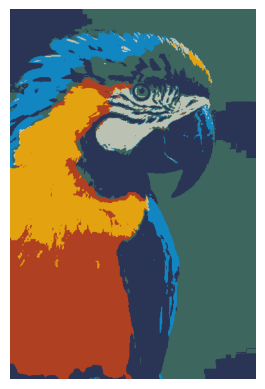

In [ ]:
BGRim = cv2.imread(r"/content/perrot.jpg")
LABna, width = read_Lab_img_in_arr(BGRim)
k_mean = KMeans(k = 6)
centers, nearest_class = k_mean.fit(LABna)
RGBim = change_img_pixels(centers, nearest_class, LABna, width)
create_plot(RGBim)


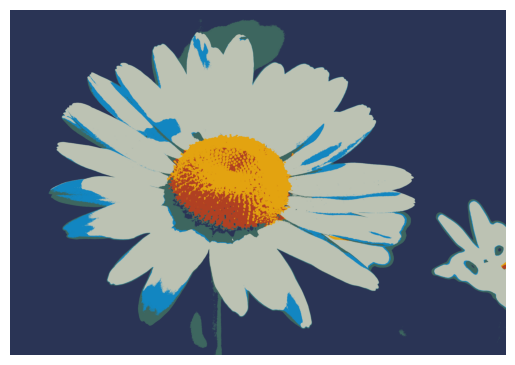

In [ ]:
BGRim2 = cv2.imread(r"/content/ромашка.jpg")
LABna2, width2 = read_Lab_img_in_arr(BGRim2)
nearest_class2 = k_mean.predict(LABna2)

RGBim2 = change_img_pixels(centers, nearest_class2, LABna2, width2)
create_plot(RGBim2)

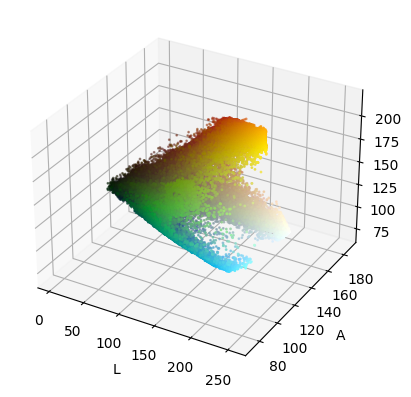

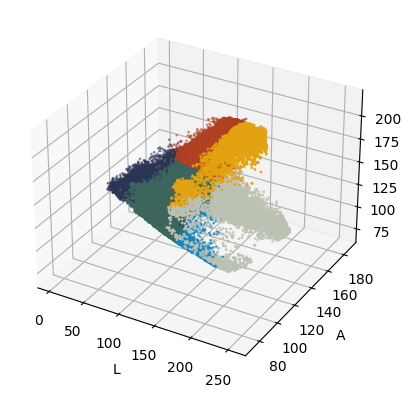

In [ ]:
l, a, b = LABna[:, 0], LABna[:, 1], LABna[:, 2]
colors = RGBim.reshape((len(l), 3))/255
RGB_initial = cv2.cvtColor(BGRim, cv2.COLOR_BGR2RGB)
colors_initial = RGB_initial.reshape((len(l), 3))/255
k_mean.plot_scatter(l, a, b, colors_initial)
k_mean.plot_scatter(l, a, b, colors)

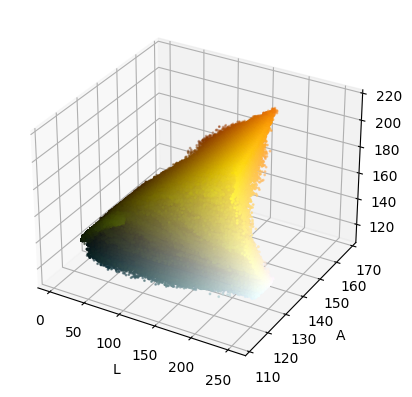

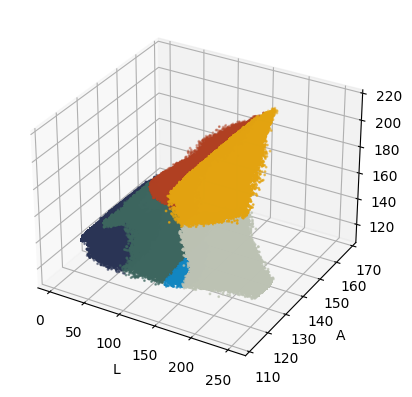

In [ ]:
l, a, b = LABna2[:, 0], LABna2[:, 1], LABna2[:, 2]
colors = RGBim2.reshape((len(l), 3))/255
RGB_initial = cv2.cvtColor(BGRim2, cv2.COLOR_BGR2RGB)
colors_initial = RGB_initial.reshape((len(l), 3))/255
k_mean.plot_scatter(l, a, b, colors_initial)
k_mean.plot_scatter(l, a, b, colors)